In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobs-in-data/jobs_in_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../input/jobs-in-data/jobs_in_data.csv")
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [5]:
df.shape

(9355, 12)

In [6]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [7]:
df['work_year'].unique()

array([2023, 2022, 2020, 2021])

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [10]:
df = df.drop(['salary','company_location','salary_currency'],axis=1)
df.head()

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,L
1,2023,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,M
2,2023,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,M
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,M
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,M


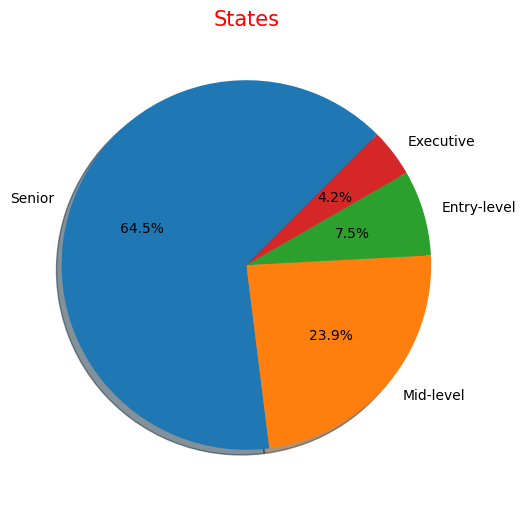

In [11]:
exp_level = df["experience_level"].value_counts().index
count = df["experience_level"].value_counts()
plt.figure(figsize = (6,6))
plt.pie(count, labels=exp_level, autopct='%1.1f%%', rotatelabels=False,shadow=True, startangle=45)
plt.title('States',color = 'red',fontsize = 15)
plt.show() 

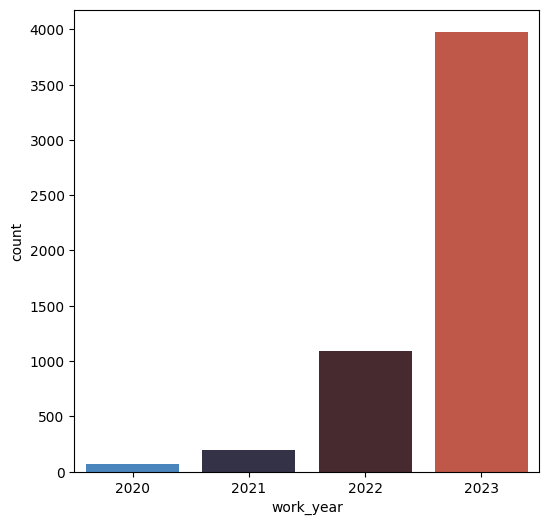

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='work_year',palette='icefire')
plt.show()

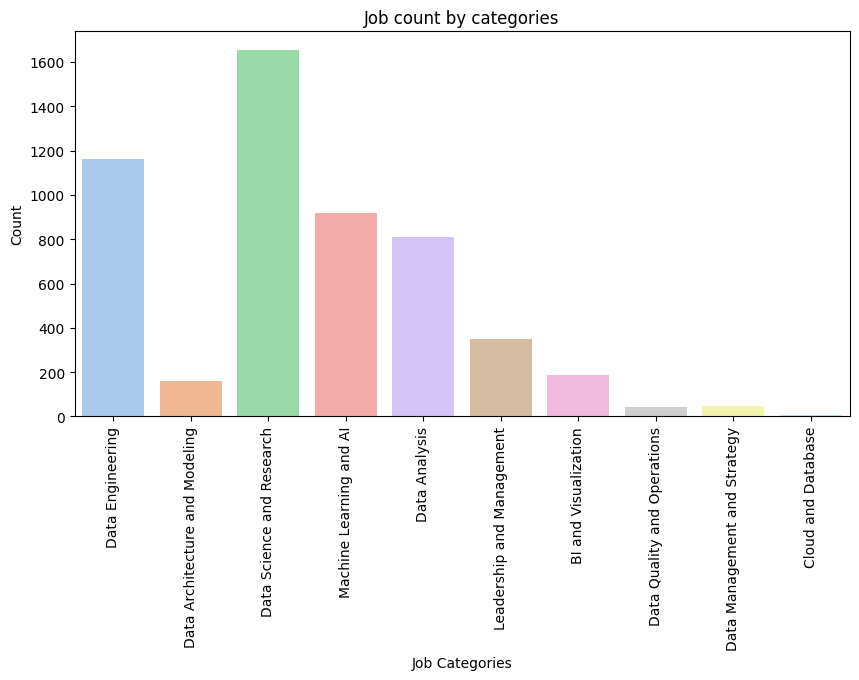

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='job_category',palette='pastel')
plt.title('Job count by categories')
plt.xlabel('Job Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [14]:
top_job_titles = df.groupby('job_title', as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd', ascending=False).head(10)
top_job_titles

,job_title,salary_in_usd
119,Research Scientist,450000
35,Data Analyst,430967
7,Analytics Engineer,430640
11,Applied Machine Learning Scientist,423000
114,Principal Data Scientist,416000
69,Data Scientist,412000
38,Data Analytics Lead,405000
8,Analytics Engineering Manager,399880
96,Machine Learning Engineer,392000
93,ML Engineer,385000


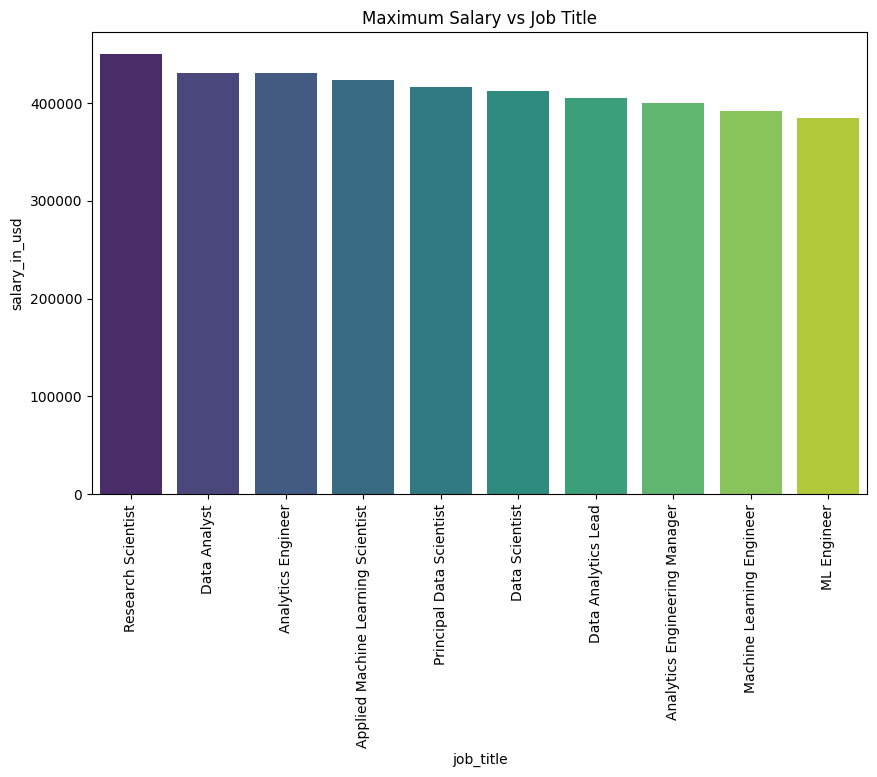

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_job_titles,x='job_title',y='salary_in_usd',palette='viridis')
plt.title('Maximum Salary vs Job Title')
plt.xticks(rotation=90)
plt.show()

In [16]:
df.head()

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,L
1,2023,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,M
2,2023,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,M
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,M
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,M


In [17]:
top_job_titles_mean = df.groupby('job_title', as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd', ascending=False).head(10)
top_job_titles_mean

,job_title,salary_in_usd
8,Analytics Engineering Manager,399880.000000
68,Data Science Tech Lead,375000.000000
107,Managing Director Data Science,300000.000000
87,Head of Machine Learning,259000.000000
6,AWS Data Architect,258000.000000
28,Cloud Data Architect,250000.000000
0,AI Architect,233656.000000
80,Director of Data Science,215447.629630
104,Machine Learning Software Engineer,212907.692308
38,Data Analytics Lead,210874.666667


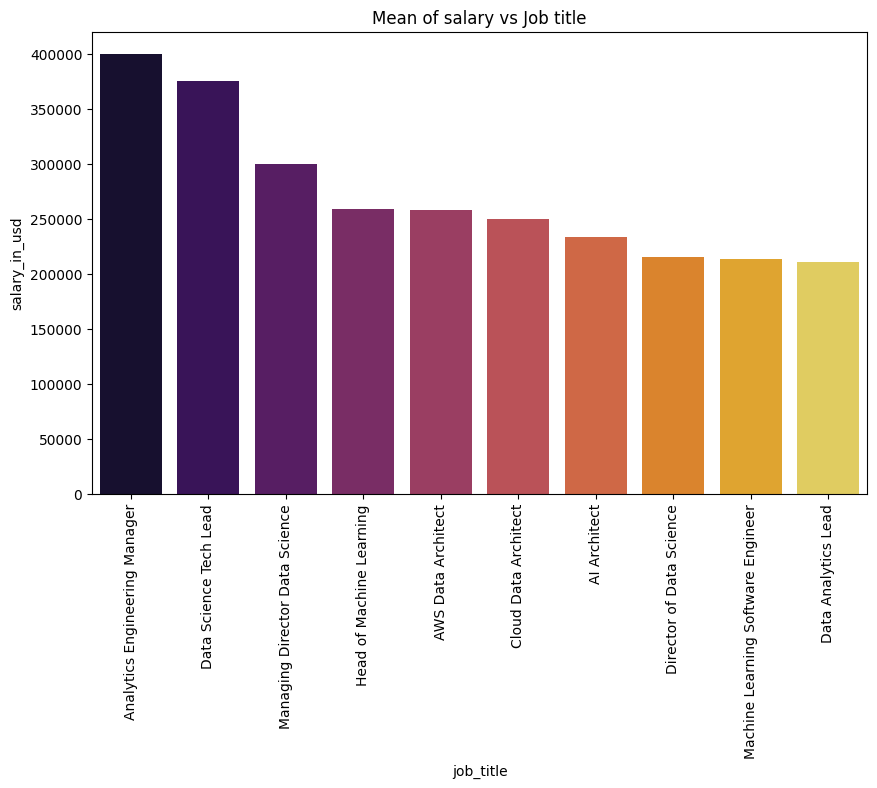

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_job_titles_mean,x='job_title',y='salary_in_usd',palette='inferno')
plt.title('Mean of salary vs Job title')
plt.xticks(rotation=90)
plt.show()

In [19]:
top_job_category = df.groupby('job_category', as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd', ascending=False).head(10)
top_job_category

,job_category,salary_in_usd
9,Machine Learning and AI,170453.221374
7,Data Science and Research,157131.039879
3,Data Architecture and Modeling,157054.006173
1,Cloud and Database,155000.000000
8,Leadership and Management,149020.108262
4,Data Engineering,142967.543103
0,BI and Visualization,128377.734043
5,Data Management and Strategy,107655.836735
2,Data Analysis,106707.058096
6,Data Quality and Operations,104586.022222


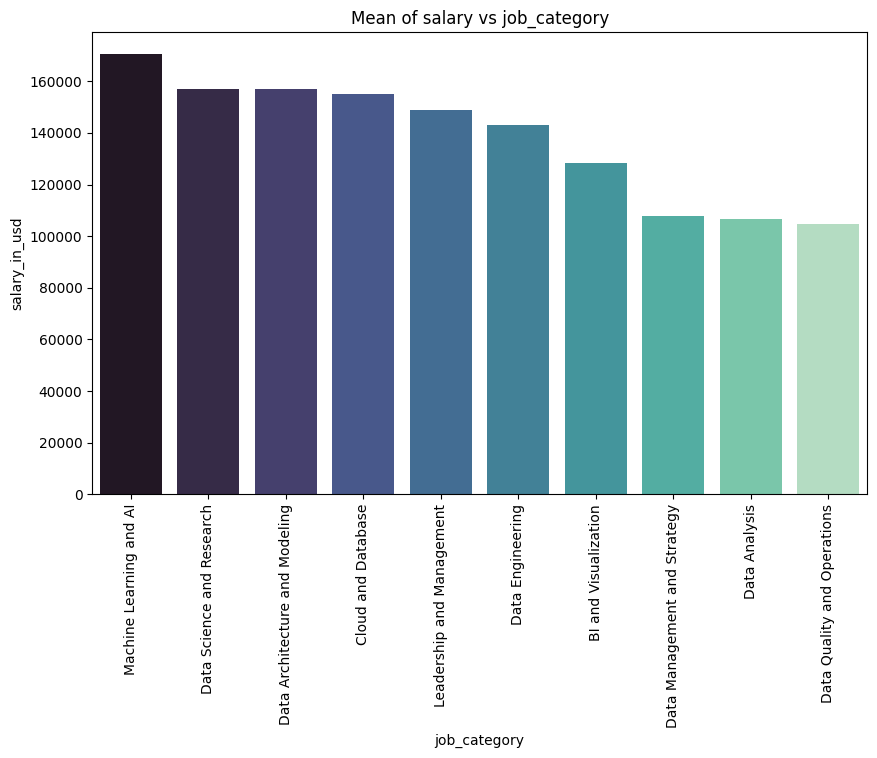

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_job_category,x='job_category',y='salary_in_usd',palette='mako')
plt.title('Mean of salary vs job_category')
plt.xticks(rotation=90)
plt.show()

In [21]:
df.head()

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_size
0,2023,Data DevOps Engineer,Data Engineering,95012,Germany,Mid-level,Full-time,Hybrid,L
1,2023,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,M
2,2023,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,M
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,M
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,M


In [22]:
work_setting_salary = df.groupby('work_setting', as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd', ascending=False).head(10)
work_setting_salary

,work_setting,salary_in_usd
1,In-person,153629.052523
2,Remote,141493.175525
0,Hybrid,89108.534392


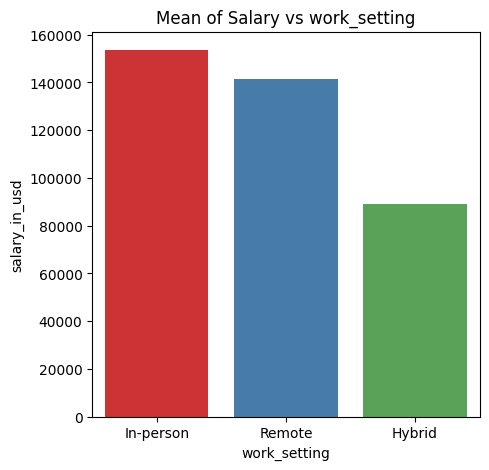

In [23]:
plt.figure(figsize=(5,5))
sns.barplot(data=work_setting_salary,x='work_setting',y='salary_in_usd',palette='Set1')
plt.title('Mean of Salary vs work_setting')
plt.show()

In [24]:
location_wise_salary = df.groupby('employee_residence', as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd', ascending=False).head(10)
location_wise_salary

,employee_residence,salary_in_usd
61,Qatar,300000.000000
47,Malaysia,200000.000000
60,Puerto Rico,166000.000000
80,United States,158529.642068
12,Canada,140447.897959
40,Japan,135500.000000
64,Saudi Arabia,134999.000000
5,Australia,127180.000000
15,China,125404.000000
53,New Zealand,125000.000000


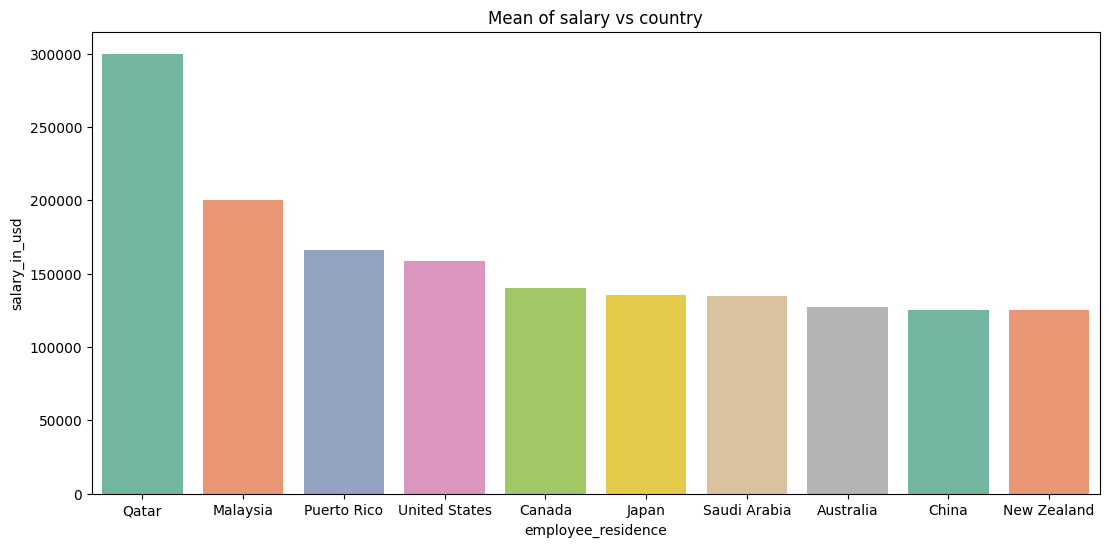

In [25]:
plt.figure(figsize=(13,6))
sns.barplot(data=location_wise_salary,x='employee_residence',y='salary_in_usd',palette='Set2')
plt.title("Mean of salary vs country")
plt.show()

<Axes: >

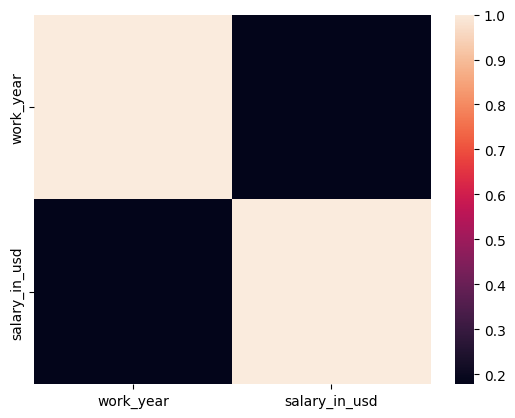

In [26]:
sns.heatmap(df.corr(numeric_only=True))